<a href="https://colab.research.google.com/github/AmeerHamza-345/Q2/blob/main/Gemini_API_Model_tuning_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install -q google-generativeai

In [4]:
import google.generativeai as genai

In [25]:
from google.colab import userdata
api_key = userdata.get('GEMINI_API_KEY')
genai.configure(api_key=api_key)


In [31]:
for i, m in zip(range(5), genai.list_tuned_models()):
  print(i,m)

In [29]:
base_model = [
    m for m in genai.list_models()
    if "createTunedModel" in m.supported_generation_methods and
    "flash" in m.name][0]
base_model

Model(name='models/gemini-1.5-flash-001-tuning',
      base_model_id='',
      version='001',
      display_name='Gemini 1.5 Flash 001 Tuning',
      description=('Version of Gemini 1.5 Flash that supports tuning, our fast and versatile '
                   'multimodal model for scaling across diverse tasks, released in May of 2024.'),
      input_token_limit=16384,
      output_token_limit=8192,
      supported_generation_methods=['generateContent', 'countTokens', 'createTunedModel'],
      temperature=1.0,
      max_temperature=2.0,
      top_p=0.95,
      top_k=64)

In [56]:
import random
import google.generativeai as genai
name = f'generate-num-{random.randint(0,10000)}'
operation = genai.create_tuned_model(
    # You can use a tuned model here too. Set `source_model="tunedModels/..."`
    source_model=base_model.name,
    training_data=[
        {
             'text_input': '1',
             'output': '2',
        },{
             'text_input': '3',
             'output': '4',
        },{
             'text_input': '-3',
             'output': '-2',
        },{
             'text_input': 'twenty two',
             'output': 'twenty three',
        },{
             'text_input': 'two hundred',
             'output': 'two hundred one',
        },{
             'text_input': 'ninety nine',
             'output': 'one hundred',
        },{
             'text_input': '8',
             'output': '9',
        },{
             'text_input': '-98',
             'output': '-97',
        },{
             'text_input': '1,000',
             'output': '1,001',
        },{
             'text_input': '10,100,000',
             'output': '10,100,001',
        },{
             'text_input': 'thirteen',
             'output': 'fourteen',
        },{
             'text_input': 'eighty',
             'output': 'eighty one',
        },{
             'text_input': 'one',
             'output': 'two',
        },{
             'text_input': 'three',
             'output': 'four',
        },{
             'text_input': 'seven',
             'output': 'eight',
        }
    ],
    id = name,
    epoch_count = 3,         # epoch_count: ماڈل کو مکمل ڈیٹا سیٹ پر کتنی بار تربیت دی جائے گی۔
    batch_size=3,            # batch_size: تربیت کے دوران ایک وقت میں کتنے نمونے پروسیس کیے جائیں گے
    learning_rate=0.001,     # learning_rate: ماڈل کے وزن کو اپڈیٹ کرنے کی رفتار کو کنٹرول کرتا ہے
)

In [57]:
model = genai.get_tuned_model(f'tunedModels/{name}')

model

TunedModel(name='tunedModels/generate-num-7085',
           source_model='models/gemini-1.5-flash-001-tuning',
           base_model='models/gemini-1.5-flash-001-tuning',
           display_name='',
           description='',
           temperature=1.0,
           top_p=0.95,
           top_k=64,
           state=<State.CREATING: 1>,
           create_time=datetime.datetime(2025, 1, 23, 10, 20, 52, 28027, tzinfo=datetime.timezone.utc),
           update_time=datetime.datetime(2025, 1, 23, 10, 20, 52, 28027, tzinfo=datetime.timezone.utc),
           tuning_task=TuningTask(start_time=datetime.datetime(2025, 1, 23, 10, 20, 52, 632773, tzinfo=datetime.timezone.utc),
                                  complete_time=None,
                                  snapshots=[],
                                  hyperparameters=Hyperparameters(epoch_count=3,
                                                                  batch_size=3,
                                                                  

In [58]:
model.state

<State.CREATING: 1>

In [59]:
import tqdm

In [60]:
operation.metadata

tuned_model: "tunedModels/generate-num-7085"
total_steps: 15

In [61]:
# prompt: use tqdm
# for status in operation.wait_bar():
#   time.sleep(30)

import time
from tqdm import tqdm

for status in tqdm(operation.wait_bar(), desc="Tuning model"):
  time.sleep(30)

Tuning model: 0it [00:00, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Tuning model: 0it [00:11, ?it/s]


In [36]:
# import time

# for status in operation.wait_bar():
#   time.sleep(30)

  0%|          | 0/375 [00:00<?, ?it/s]

In [ ]:
# operation.cancel()

<Axes: xlabel='epoch', ylabel='mean_loss'>

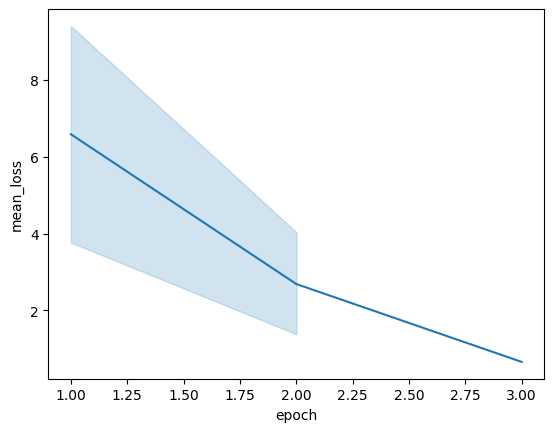

In [62]:
import pandas as pd
import seaborn as sns

model = operation.result()

snapshots = pd.DataFrame(model.tuning_task.snapshots)

sns.lineplot(data=snapshots, x = 'epoch', y='mean_loss')

In [63]:

model = genai.GenerativeModel(model_name=f'tunedModels/{name}')

In [73]:
result = model.generate_content('22')
result.text

'23'

In [82]:
result = model.generate_content('999999')
result.text

'1000000'

In [47]:
result = model.generate_content('123455')
result.text

'123456'

In [69]:
result = model.generate_content('four')
result.text

'five'

In [70]:
result = model.generate_content('quatre') # French 4
result.text                               # French 5 is "cinq"

'cinq'

In [71]:
result = model.generate_content('III')    # Roman numeral 3
result.text                               # Roman numeral 4 is IV

'IV'

#**Update the description**
You can update the description of your tuned model any time using the [genai.update_tuned_model] method.

In [52]:
genai.update_tuned_model(f'tunedModels/{name}', {"description":"This is my model."});

In [53]:
model = genai.get_tuned_model(f'tunedModels/{name}')

model.description

'This is my model.'

#**Delete the model**
You can clean up your tuned model list by deleting models you no longer need. Use the genai.delete_tuned_model method to delete a model. If you canceled any tuning jobs, you may want to delete those as their performance may be unpredictable.

In [54]:
# genai.delete_tuned_model(f'tunedModels/{name}')

In [ ]:
# try:
#   m = genai.get_tuned_model(f'tunedModels/{name}')
#   print(m)
# except Exception as e:
#   print(f"{type(e)}: {e}")